In [1]:
import pandas as pd
import pickle
from PIL import Image
import numpy as np
import os
import torch
import torch.autograd as autograd
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import shelve
import math
import numpy as np
import sys
import matplotlib.pyplot as plt
import scipy.stats as stats
import random
import pickle5 as pickle
import scipy.io
from scipy.stats import sem
import dataframe_image as dfi

In [2]:
RDM_value_A = pickle.load(open('/mmfs1/data/zhouabx/KDEF/KDEF_RDM_new/2023_Oct_RDMs/Pixel_Similarity/RDM_Results/RDM_value_A.pkl', "rb"))
v_RDM_value_A = RDM_value_A[np.triu_indices(RDM_value_A.shape[0], 1)]

RDM_value_B = pickle.load(open('/mmfs1/data/zhouabx/KDEF/KDEF_RDM_new/2023_Oct_RDMs/Pixel_Similarity/RDM_Results/RDM_value_B.pkl', "rb"))
v_RDM_value_B = RDM_value_B[np.triu_indices(RDM_value_B.shape[0], 1)]

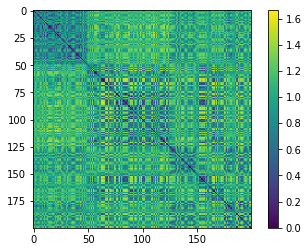

In [4]:
plt.imshow(RDM_value_B)  ## note that this is named RDM A in the paper
plt.colorbar()

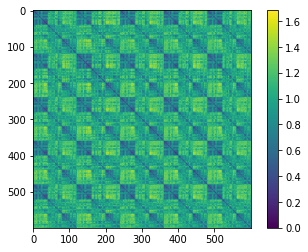

In [3]:
plt.imshow(RDM_value_A)  ## note that this is named RDM B in the paper
plt.colorbar()

In [5]:
folder_path = '/mmfs1/data/zhouabx/iEEG_rdms/data/vA/p16/'
vA_p16_rdms = []
v_vA_p16_rdms = []

# get RDMs
for data_file in sorted(os.listdir(folder_path))[1:]:
    vA_p16_rdms.append(scipy.io.loadmat(folder_path + data_file).get("disMatwind"))
    
for i in range (len(vA_p16_rdms)):
    vector = vA_p16_rdms[i][np.triu_indices(vA_p16_rdms[i].shape[0], 1)]
    v_vA_p16_rdms.append(vector)

In [6]:
kendalltau_data_A_and_vA_p16 = []
for i in range (len(v_vA_p16_rdms)):   
    kendalltau_data_A_and_vA_p16.append(stats.kendalltau(v_RDM_value_A, v_vA_p16_rdms[i]))
    
corr, _ = kendalltau_data_A_and_vA_p16[0]
print('subset A and p16_e90_wind4 kendalltau: %.5f' % corr)

corr, _ = kendalltau_data_A_and_vA_p16[1]
print('subset A and p16_e90_wind5 kendalltau: %.5f' % corr)

corr, _ = kendalltau_data_A_and_vA_p16[2]
print('subset A and p16_e90_wind6 kendalltau: %.5f' % corr)

subset A and p16_e90_wind4 kendalltau: 0.03408
subset A and p16_e90_wind5 kendalltau: 0.02136
subset A and p16_e90_wind6 kendalltau: 0.00913


In [26]:
folder_path = '/mmfs1/data/zhouabx/iEEG_rdms/data/vA/p23/'
vA_p23_rdms = []
v_vA_p23_rdms = []

# get RDMs
for data_file in sorted(os.listdir(folder_path)):
    # print (data_file)
    vA_p23_rdms.append(scipy.io.loadmat(folder_path + data_file).get("disMatwind"))
    
for i in range (len(vA_p23_rdms)):
    vector = vA_p23_rdms[i][np.triu_indices(vA_p23_rdms[i].shape[0], 1)]
    v_vA_p23_rdms.append(vector)

kendalltau_data_A_and_vA_p23 = []
for i in range (len(v_vA_p23_rdms)):   
    kendalltau_data_A_and_vA_p23.append(stats.kendalltau(v_RDM_value_A, v_vA_p23_rdms[i]))

    
corr, _ = kendalltau_data_A_and_vA_p23[0]
print('subset A and p23_wind4 kendalltau: 0')

corr, _ = kendalltau_data_A_and_vA_p23[1]
print('subset A and p23_wind5 kendalltau: 0')

corr, _ = kendalltau_data_A_and_vA_p23[2]
print('subset A and p23_wind6 kendalltau: 0')    

subset A and p23_wind4 kendalltau: 0
subset A and p23_wind5 kendalltau: 0
subset A and p23_wind6 kendalltau: 0


In [8]:
folder_path = '/mmfs1/data/zhouabx/iEEG_rdms/data/vA/p27/'
vA_p27_rdms = []
v_vA_p27_rdms = []

# get RDMs
for data_file in sorted(os.listdir(folder_path)):
    # print (data_file)
    vA_p27_rdms.append(scipy.io.loadmat(folder_path + data_file).get("disMatwind"))
    
for i in range (len(vA_p27_rdms)):
    vector = vA_p27_rdms[i][np.triu_indices(vA_p27_rdms[i].shape[0], 1)]
    v_vA_p27_rdms.append(vector)
    
kendalltau_data_A_and_vA_p27 = []
for i in range (len(v_vA_p27_rdms)):   
    kendalltau_data_A_and_vA_p27.append(stats.kendalltau(v_RDM_value_A, v_vA_p27_rdms[i]))

corr, _ = kendalltau_data_A_and_vA_p27[0]
print('subset A and p27_e100_wind4 kendalltau: %.5f' % corr)

corr, _ = kendalltau_data_A_and_vA_p27[1]
print('subset A and p27_e100_wind5 kendalltau: %.5f' % corr)

corr, _ = kendalltau_data_A_and_vA_p27[2]
print('subset A and p27_e100_wind6 kendalltau: %.5f' % corr)

corr, _ = kendalltau_data_A_and_vA_p27[3]
print('subset A and p27_e53_wind4 kendalltau: %.5f' % corr)

corr, _ = kendalltau_data_A_and_vA_p27[4]
print('subset A and p27_e53_wind5 kendalltau: %.5f' % corr)

corr, _ = kendalltau_data_A_and_vA_p27[5]
print('subset A and p27_e53_wind6 kendalltau: %.5f' % corr)

corr, _ = kendalltau_data_A_and_vA_p27[6]
print('subset A and p27_e60_wind4 kendalltau: %.5f' % corr)

corr, _ = kendalltau_data_A_and_vA_p27[7]
print('subset A and p27_e60_wind5 kendalltau: %.5f' % corr)

corr, _ = kendalltau_data_A_and_vA_p27[8]
print('subset A and p27_e60_wind6 kendalltau: %.5f' % corr)

corr, _ = kendalltau_data_A_and_vA_p27[9]
print('subset A and p27_e61_wind4 kendalltau: %.5f' % corr)

corr, _ = kendalltau_data_A_and_vA_p27[10]
print('subset A and p27_e61_wind5 kendalltau: %.5f' % corr)

corr, _ = kendalltau_data_A_and_vA_p27[11]
print('subset A and p27_e61_wind6 kendalltau: %.5f' % corr)

corr, _ = kendalltau_data_A_and_vA_p27[12]
print('subset A and p27_e62_wind4 kendalltau: %.5f' % corr)

corr, _ = kendalltau_data_A_and_vA_p27[13]
print('subset A and p27_e62_wind5 kendalltau: %.5f' % corr)

corr, _ = kendalltau_data_A_and_vA_p27[14]
print('subset A and p27_e62_wind6 kendalltau: %.5f' % corr)

subset A and p27_e100_wind4 kendalltau: 0.04789
subset A and p27_e100_wind5 kendalltau: 0.02420
subset A and p27_e100_wind6 kendalltau: 0.00955
subset A and p27_e53_wind4 kendalltau: 0.05289
subset A and p27_e53_wind5 kendalltau: 0.07767
subset A and p27_e53_wind6 kendalltau: 0.04484
subset A and p27_e60_wind4 kendalltau: 0.02166
subset A and p27_e60_wind5 kendalltau: 0.03529
subset A and p27_e60_wind6 kendalltau: 0.00797
subset A and p27_e61_wind4 kendalltau: 0.01375
subset A and p27_e61_wind5 kendalltau: 0.04434
subset A and p27_e61_wind6 kendalltau: 0.02265
subset A and p27_e62_wind4 kendalltau: 0.04019
subset A and p27_e62_wind5 kendalltau: 0.04369
subset A and p27_e62_wind6 kendalltau: 0.03259


In [9]:
folder_path = '/mmfs1/data/zhouabx/iEEG_rdms/data/vA/p28/'
vA_p28_rdms = []
v_vA_p28_rdms = []

# get RDMs
for data_file in sorted(os.listdir(folder_path))[1:]:
    # print (data_file)
    vA_p28_rdms.append(scipy.io.loadmat(folder_path + data_file).get("disMatwind"))
    
for i in range (len(vA_p28_rdms)):
    vector = vA_p28_rdms[i][np.triu_indices(vA_p28_rdms[i].shape[0], 1)]
    v_vA_p28_rdms.append(vector)

kendalltau_data_A_and_vA_p28 = []
for i in range (len(v_vA_p28_rdms)):   
    kendalltau_data_A_and_vA_p28.append(stats.kendalltau(v_RDM_value_A, v_vA_p28_rdms[i]))

corr, _ = kendalltau_data_A_and_vA_p28[0]
print('subset A and p28_e85_wind4 kendalltau: %.5f' % corr)

corr, _ = kendalltau_data_A_and_vA_p28[1]
print('subset A and p28_e85_wind5 kendalltau: %.5f' % corr)

corr, _ = kendalltau_data_A_and_vA_p28[2]
print('subset A and p28_e85_wind6 kendalltau: %.5f' % corr)

subset A and p28_e85_wind4 kendalltau: 0.04733
subset A and p28_e85_wind5 kendalltau: 0.00819
subset A and p28_e85_wind6 kendalltau: 0.00559


In [11]:
folder_path = '/mmfs1/data/zhouabx/iEEG_rdms/data/vA/p30/'
vA_p30_rdms = []
v_vA_p30_rdms = []

# get RDMs
for data_file in sorted(os.listdir(folder_path)):
    # print (data_file)
    vA_p30_rdms.append(scipy.io.loadmat(folder_path + data_file).get("disMatwind"))
    
for i in range (len(vA_p30_rdms)):
    vector = vA_p30_rdms[i][np.triu_indices(vA_p30_rdms[i].shape[0], 1)]
    v_vA_p30_rdms.append(vector)
    
kendalltau_data_A_and_vA_p30 = []
for i in range (len(v_vA_p30_rdms)):   
    kendalltau_data_A_and_vA_p30.append(stats.kendalltau(v_RDM_value_A, v_vA_p30_rdms[i]))

corr, _ = kendalltau_data_A_and_vA_p30[0]
print('subset A and p30_e8_wind4 kendalltau: %.5f' % corr)

corr, _ = kendalltau_data_A_and_vA_p30[1]
print('subset A and p30_e8_wind5 kendalltau: 0')

corr, _ = kendalltau_data_A_and_vA_p30[2]
print('subset A and p30_e8_wind6 kendalltau: %.5f' % corr)

subset A and p30_e8_wind4 kendalltau: 0.00024
subset A and p30_e8_wind5 kendalltau: 0
subset A and p30_e8_wind6 kendalltau: 0.00082


In [14]:
folder_path = '/mmfs1/data/zhouabx/iEEG_rdms/data/vA/p34/'
vA_p34_rdms = []
v_vA_p34_rdms = []

# get RDMs
for data_file in sorted(os.listdir(folder_path)):
    # print (data_file)
    vA_p34_rdms.append(scipy.io.loadmat(folder_path + data_file).get("disMatwind"))
    
for i in range (len(vA_p34_rdms)):
    vector = vA_p34_rdms[i][np.triu_indices(vA_p34_rdms[i].shape[0], 1)]
    v_vA_p34_rdms.append(vector)

kendalltau_data_A_and_vA_p34 = []
for i in range (len(v_vA_p34_rdms)):   
    kendalltau_data_A_and_vA_p34.append(stats.kendalltau(v_RDM_value_A, v_vA_p34_rdms[i]))

corr, _ = kendalltau_data_A_and_vA_p34[0]
print('subset A and p34_e23_wind4 kendalltau: 0')

corr, _ = kendalltau_data_A_and_vA_p34[1]
print('subset A and p34_e23_wind5 kendalltau: 0')

corr, _ = kendalltau_data_A_and_vA_p34[2]
print('subset A and p34_e23_wind6 kendalltau: 0')

corr, _ = kendalltau_data_A_and_vA_p34[3]
print('subset A and p34_e42_wind4 kendalltau: %.5f' % corr)

corr, _ = kendalltau_data_A_and_vA_p34[4]
print('subset A and p34_e42_wind5 kendalltau: %.5f' % corr)

corr, _ = kendalltau_data_A_and_vA_p34[5]
print('subset A and p34_e42_wind6 kendalltau: %.5f' % corr)

corr, _ = kendalltau_data_A_and_vA_p34[6]
print('subset A and p34_e44_wind4 kendalltau: %.5f' % corr)

corr, _ = kendalltau_data_A_and_vA_p34[7]
print('subset A and p34_e44_wind5 kendalltau: %.5f' % corr)

corr, _ = kendalltau_data_A_and_vA_p34[8]
print('subset A and p34_e44_wind6 kendalltau: %.5f' % corr)

corr, _ = kendalltau_data_A_and_vA_p34[9]
print('subset A and p43_e43_wind4 kendalltau: %.5f' % corr)

corr, _ = kendalltau_data_A_and_vA_p34[10]
print('subset A and p43_e43_wind5 kendalltau: %.5f' % corr)

corr, _ = kendalltau_data_A_and_vA_p34[11]
print('subset A and p43_e43_wind6 kendalltau: %.5f' % corr)

subset A and p34_e23_wind4 kendalltau: 0
subset A and p34_e23_wind5 kendalltau: 0
subset A and p34_e23_wind6 kendalltau: 0
subset A and p34_e42_wind4 kendalltau: 0.01408
subset A and p34_e42_wind5 kendalltau: 0.00522
subset A and p34_e42_wind6 kendalltau: 0.00260
subset A and p34_e44_wind4 kendalltau: 0.02613
subset A and p34_e44_wind5 kendalltau: 0.01689
subset A and p34_e44_wind6 kendalltau: 0.00393
subset A and p43_e43_wind4 kendalltau: 0.07572
subset A and p43_e43_wind5 kendalltau: 0.03629
subset A and p43_e43_wind6 kendalltau: 0.00365


In [15]:
folder_path = '/mmfs1/data/zhouabx/iEEG_rdms/data/vA/p36/'
vA_p36_rdms = []
v_vA_p36_rdms = []

# get RDMs
for data_file in sorted(os.listdir(folder_path))[1:]:
    # print (data_file)
    vA_p36_rdms.append(scipy.io.loadmat(folder_path + data_file).get("disMatwind"))
    
for i in range (len(vA_p36_rdms)):
    vector = vA_p36_rdms[i][np.triu_indices(vA_p36_rdms[i].shape[0], 1)]
    v_vA_p36_rdms.append(vector)
    
kendalltau_data_A_and_vA_p36 = []
for i in range (len(v_vA_p36_rdms)):   
    kendalltau_data_A_and_vA_p36.append(stats.kendalltau(v_RDM_value_A, v_vA_p36_rdms[i]))

corr, _ = kendalltau_data_A_and_vA_p36[0]
print('subset A and p36_e64_wind4 kendalltau: %.5f' % corr)

corr, _ = kendalltau_data_A_and_vA_p36[1]
print('subset A and p36_e64_wind5 kendalltau: %.5f' % corr)

corr, _ = kendalltau_data_A_and_vA_p36[2]
print('subset A and p36_e64_wind6 kendalltau: %.5f' % corr)

corr, _ = kendalltau_data_A_and_vA_p36[3]
print('subset A and p36_e69_wind4 kendalltau: %.5f' % corr)

corr, _ = kendalltau_data_A_and_vA_p36[4]
print('subset A and p36_e69_wind5 kendalltau: %.5f' % corr)

corr, _ = kendalltau_data_A_and_vA_p36[5]
print('subset A and p36_e69_wind6 kendalltau: %.5f' % corr)

corr, _ = kendalltau_data_A_and_vA_p36[6]
print('subset A and p36_e70_wind4 kendalltau: %.5f' % corr)

corr, _ = kendalltau_data_A_and_vA_p36[7]
print('subset A and p36_e70_wind5 kendalltau: %.5f' % corr)

corr, _ = kendalltau_data_A_and_vA_p36[8]
print('subset A and p36_e70_wind6 kendalltau: %.5f' % corr)

subset A and p36_e64_wind4 kendalltau: 0.10060
subset A and p36_e64_wind5 kendalltau: 0.07959
subset A and p36_e64_wind6 kendalltau: 0.03794
subset A and p36_e69_wind4 kendalltau: 0.00278
subset A and p36_e69_wind5 kendalltau: 0.00484
subset A and p36_e69_wind6 kendalltau: 0.00558
subset A and p36_e70_wind4 kendalltau: 0.00137
subset A and p36_e70_wind5 kendalltau: 0.00484
subset A and p36_e70_wind6 kendalltau: 0.00047


In [17]:
folder_path = '/mmfs1/data/zhouabx/iEEG_rdms/data/vA/p39/'
vA_p39_rdms = []
v_vA_p39_rdms = []

# get RDMs
for data_file in sorted(os.listdir(folder_path)):
    # print (data_file)
    vA_p39_rdms.append(scipy.io.loadmat(folder_path + data_file).get("disMatwind"))
    
for i in range (len(vA_p39_rdms)):
    vector = vA_p39_rdms[i][np.triu_indices(vA_p39_rdms[i].shape[0], 1)]
    v_vA_p39_rdms.append(vector)
    
kendalltau_data_A_and_vA_p39 = []
for i in range (len(v_vA_p39_rdms)):   
    kendalltau_data_A_and_vA_p39.append(stats.kendalltau(v_RDM_value_A, v_vA_p39_rdms[i]))

corr, _ = kendalltau_data_A_and_vA_p39[0]
print('subset A and p39_wind4 kendalltau: %.5f' % corr)

corr, _ = kendalltau_data_A_and_vA_p39[1]
print('subset A and p39_wind5 kendalltau: 0')

corr, _ = kendalltau_data_A_and_vA_p39[2]
print('subset A and p39_wind6 kendalltau: 0')

subset A and p39_wind4 kendalltau: 0.00018
subset A and p39_wind5 kendalltau: 0
subset A and p39_wind6 kendalltau: 0


In [22]:
folder_path = '/mmfs1/data/zhouabx/iEEG_rdms/data/vB/p41/'
vB_p41_rdms = []
v_vB_p41_rdms = []

# get RDMs
for data_file in sorted(os.listdir(folder_path))[1:]:
    # print (data_file)
    vB_p41_rdms.append(scipy.io.loadmat(folder_path + data_file).get("disMatwind"))
    
for i in range (len(vB_p41_rdms)):
    vector = vB_p41_rdms[i][np.triu_indices(vB_p41_rdms[i].shape[0], 1)]
    v_vB_p41_rdms.append(vector)
    
kendalltau_data_B_and_vB_p41 = []
for i in range (len(v_vB_p41_rdms)):   
    kendalltau_data_B_and_vB_p41.append(stats.kendalltau(v_RDM_value_B, v_vB_p41_rdms[i]))

    
corr, _ = kendalltau_data_B_and_vB_p41[1]
print('subset B and p41_e10_wind4 kendalltau: %.5f' % corr)

corr, _ = kendalltau_data_B_and_vB_p41[2]
print('subset B and p41_e10_wind5 kendalltau: %.5f' % corr)

corr, _ = kendalltau_data_B_and_vB_p41[3]
print('subset B and p41_e10_wind6 kendalltau: %.5f' % corr)

corr, _ = kendalltau_data_B_and_vB_p41[7]
print('subset B and p41_e11_wind4 kendalltau: %.5f' % corr)

corr, _ = kendalltau_data_B_and_vB_p41[8]
print('subset B and p41_e11_wind5 kendalltau: %.5f' % corr)

corr, _ = kendalltau_data_B_and_vB_p41[9]
print('subset B and p41_e11_wind6 kendalltau: 0')

corr, _ = kendalltau_data_B_and_vB_p41[13]
print('subset B and p41_e12_wind4 kendalltau: 0')

corr, _ = kendalltau_data_B_and_vB_p41[14]
print('subset B and p41_e12_wind5 kendalltau: 0')

corr, _ = kendalltau_data_B_and_vB_p41[15]
print('subset B and p41_e12_wind6 kendalltau: %.5f' % corr)

corr, _ = kendalltau_data_B_and_vB_p41[19]
print('subset B and p41_e2_wind4 kendalltau: %.5f' % corr)

corr, _ = kendalltau_data_B_and_vB_p41[20]
print('subset B and p41_e2_wind5 kendalltau: %.5f' % corr)

corr, _ = kendalltau_data_B_and_vB_p41[21]
print('subset B and p41_e2_wind6 kendalltau: %.5f' % corr)

corr, _ = kendalltau_data_B_and_vB_p41[25]
print('subset B and p41_e24_wind4 kendalltau: 0')

corr, _ = kendalltau_data_B_and_vB_p41[26]
print('subset B and p41_e24_wind5 kendalltau: %.5f' % corr)

corr, _ = kendalltau_data_B_and_vB_p41[27]
print('subset B and p41_e24_wind6 kendalltau: 0')

corr, _ = kendalltau_data_B_and_vB_p41[31]
print('subset B and p41_e9_wind4 kendalltau: %.5f' % corr)

corr, _ = kendalltau_data_B_and_vB_p41[32]
print('subset B and p41_e9_wind5 kendalltau: %.5f' % corr)

corr, _ = kendalltau_data_B_and_vB_p41[33]
print('subset B and p41_e9_wind6 kendalltau: 0')

subset B and p41_e10_wind4 kendalltau: 0.01136
subset B and p41_e10_wind5 kendalltau: 0.00774
subset B and p41_e10_wind6 kendalltau: 0.00697
subset B and p41_e11_wind4 kendalltau: 0.00365
subset B and p41_e11_wind5 kendalltau: 0.00499
subset B and p41_e11_wind6 kendalltau: 0
subset B and p41_e12_wind4 kendalltau: 0
subset B and p41_e12_wind5 kendalltau: 0
subset B and p41_e12_wind6 kendalltau: 0.00240
subset B and p41_e2_wind4 kendalltau: 0.00410
subset B and p41_e2_wind5 kendalltau: 0.00402
subset B and p41_e2_wind6 kendalltau: 0.00682
subset B and p41_e24_wind4 kendalltau: 0
subset B and p41_e24_wind5 kendalltau: 0.00078
subset B and p41_e24_wind6 kendalltau: 0
subset B and p41_e9_wind4 kendalltau: 0.00232
subset B and p41_e9_wind5 kendalltau: 0.00315
subset B and p41_e9_wind6 kendalltau: 0


In [23]:
folder_path = '/mmfs1/data/zhouabx/iEEG_rdms/data/vB/fusiform_reliable/p47/'
vB_p47_rdms = []
v_vB_p47_rdms = []

# get RDMs
for data_file in sorted(os.listdir(folder_path))[1:]:
    # print (data_file)
    vB_p47_rdms.append(scipy.io.loadmat(folder_path + data_file).get("disMatwind"))
    
for i in range (len(vB_p47_rdms)):
    vector = vB_p47_rdms[i][np.triu_indices(vB_p47_rdms[i].shape[0], 1)]
    v_vB_p47_rdms.append(vector)
    
kendalltau_data_B_and_vB_p47 = []
for i in range (len(v_vB_p47_rdms)):   
    kendalltau_data_B_and_vB_p47.append(stats.kendalltau(v_RDM_value_B, v_vB_p47_rdms[i]))

corr, _ = kendalltau_data_B_and_vB_p47[1]
print('subset B and p47_e34_wind4 kendalltau: %.5f' % corr)

corr, _ = kendalltau_data_B_and_vB_p47[2]
print('subset B and p47_e34_wind5 kendalltau: %.5f' % corr)

corr, _ = kendalltau_data_B_and_vB_p47[3]
print('subset B and p47_e34_wind6 kendalltau: %.5f' % corr)

subset B and p47_e34_wind4 kendalltau: 0.00204
subset B and p47_e34_wind5 kendalltau: 0.00129
subset B and p47_e34_wind6 kendalltau: 0.00285


In [27]:
path = "/data/zhouabx/KDEF/KDEF_RDM_new/2023_Oct_RDMs/Pixel_Similarity/kendalltaus/"

data_A_tau_wind4 = np.array([kendalltau_data_A_and_vA_p16[0][0],
                             0,
                             kendalltau_data_A_and_vA_p27[0][0],
                             kendalltau_data_A_and_vA_p27[3][0],
                             kendalltau_data_A_and_vA_p27[6][0],
                             kendalltau_data_A_and_vA_p27[9][0],
                             kendalltau_data_A_and_vA_p27[12][0],
                             kendalltau_data_A_and_vA_p28[0][0],
                             kendalltau_data_A_and_vA_p30[0][0],
                             0,
                             kendalltau_data_A_and_vA_p34[3][0],
                             kendalltau_data_A_and_vA_p34[6][0],
                             kendalltau_data_A_and_vA_p34[9][0],
                             kendalltau_data_A_and_vA_p36[0][0],
                             kendalltau_data_A_and_vA_p36[3][0],
                             kendalltau_data_A_and_vA_p36[6][0],
                             kendalltau_data_A_and_vA_p39[0][0],
                             kendalltau_data_B_and_vB_p41[1][0],
                             kendalltau_data_B_and_vB_p41[7][0],
                             0,
                             kendalltau_data_B_and_vB_p41[19][0],
                             0,
                             kendalltau_data_B_and_vB_p41[31][0],
                             kendalltau_data_B_and_vB_p47[1][0]])

data_A_tau_wind4_mean = np.mean(data_A_tau_wind4)
data_A_tau_wind4_sem = sem(data_A_tau_wind4)

with open(path + 'KDEF_tau_wind4.pkl', 'wb') as pickle_out:
     pickle.dump(data_A_tau_wind4, pickle_out)      
with open(path + 'KDEF_tau_wind4_mean.pkl', 'wb') as pickle_out:
     pickle.dump(data_A_tau_wind4_mean, pickle_out) 
with open(path + 'KDEF_tau_wind4_sem.pkl', 'wb') as pickle_out:
     pickle.dump(data_A_tau_wind4_sem, pickle_out) 
    

data_A_tau_wind5 = np.array([kendalltau_data_A_and_vA_p16[1][0],
                             0,
                             kendalltau_data_A_and_vA_p27[1][0],
                             kendalltau_data_A_and_vA_p27[4][0],
                             kendalltau_data_A_and_vA_p27[7][0],
                             kendalltau_data_A_and_vA_p27[10][0],
                             kendalltau_data_A_and_vA_p27[13][0],
                             kendalltau_data_A_and_vA_p28[1][0],
                             0,
                             0,
                             kendalltau_data_A_and_vA_p34[4][0],
                             kendalltau_data_A_and_vA_p34[7][0],
                             kendalltau_data_A_and_vA_p34[10][0],
                             kendalltau_data_A_and_vA_p36[1][0],
                             kendalltau_data_A_and_vA_p36[4][0],
                             kendalltau_data_A_and_vA_p36[7][0],
                             0,
                             kendalltau_data_B_and_vB_p41[2][0],
                             kendalltau_data_B_and_vB_p41[8][0],
                             0,
                             kendalltau_data_B_and_vB_p41[20][0],
                             kendalltau_data_B_and_vB_p41[26][0],
                             kendalltau_data_B_and_vB_p41[32][0],
                             kendalltau_data_B_and_vB_p47[2][0]])

data_A_tau_wind5_mean = np.mean(data_A_tau_wind5)
data_A_tau_wind5_sem = sem(data_A_tau_wind5)

with open(path + 'KDEF_tau_wind5.pkl', 'wb') as pickle_out:
     pickle.dump(data_A_tau_wind5, pickle_out)      
with open(path + 'KDEF_tau_wind5_mean.pkl', 'wb') as pickle_out:
     pickle.dump(data_A_tau_wind5_mean, pickle_out) 
with open(path + 'KDEF_tau_wind5_sem.pkl', 'wb') as pickle_out:
     pickle.dump(data_A_tau_wind5_sem, pickle_out) 
    

data_A_tau_wind6 = np.array([kendalltau_data_A_and_vA_p16[2][0],
                             0,
                             kendalltau_data_A_and_vA_p27[2][0],
                             kendalltau_data_A_and_vA_p27[5][0],
                             kendalltau_data_A_and_vA_p27[8][0],
                             kendalltau_data_A_and_vA_p27[11][0],
                             kendalltau_data_A_and_vA_p27[14][0],
                             kendalltau_data_A_and_vA_p28[2][0],
                             kendalltau_data_A_and_vA_p30[2][0],
                             0,
                             kendalltau_data_A_and_vA_p34[5][0],
                             kendalltau_data_A_and_vA_p34[8][0],
                             kendalltau_data_A_and_vA_p34[11][0],
                             kendalltau_data_A_and_vA_p36[2][0],
                             kendalltau_data_A_and_vA_p36[5][0],
                             kendalltau_data_A_and_vA_p36[8][0],
                             0,
                             kendalltau_data_B_and_vB_p41[3][0],
                             0,
                             kendalltau_data_B_and_vB_p41[15][0],
                             kendalltau_data_B_and_vB_p41[21][0],
                             0,
                             0,
                             kendalltau_data_B_and_vB_p47[3][0]])

data_A_tau_wind6_mean = np.mean(data_A_tau_wind6)
data_A_tau_wind6_sem = sem(data_A_tau_wind6)

with open(path + 'KDEF_tau_wind6.pkl', 'wb') as pickle_out:
     pickle.dump(data_A_tau_wind6, pickle_out)      
with open(path + 'KDEF_tau_wind6_mean.pkl', 'wb') as pickle_out:
     pickle.dump(data_A_tau_wind6_mean, pickle_out) 
with open(path + 'KDEF_tau_wind6_sem.pkl', 'wb') as pickle_out:
     pickle.dump(data_A_tau_wind6_sem, pickle_out) 
    